In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

2024-07-19 08:32:10.861197: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-19 08:32:10.861340: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-19 08:32:11.037095: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import pandas as pd

train_path = '/kaggle/input/mnist-in-csv/mnist_train.csv'
test_path = '/kaggle/input/mnist-in-csv/mnist_train.csv'


In [3]:
# load and preprocess
def load_and_preprocess(data_path):
    data = pd.read_csv(data_path)
    data = data.to_numpy()
    np.random.shuffle(data)
    x = data[:,1:].reshape(-1,28,28,1)/255.0
    y = data[:,0].astype(np.int32)
    y = to_categorical(y,num_classes = len(set(y)))
    
    return x,y


In [4]:
x_train,y_train = load_and_preprocess(train_path)
x_test,y_test = load_and_preprocess(test_path)

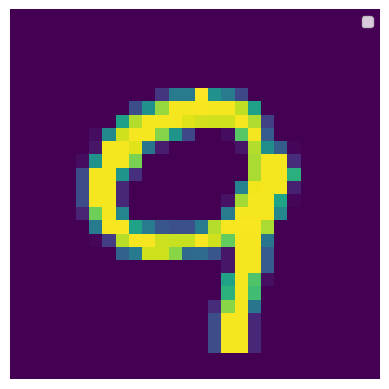

9


In [5]:
index = 3
vis = x_train.reshape(60000,28,28)
plt.imshow(vis[index,:,:])
plt.legend()
plt.axis("off")
plt.show()
print(np.argmax(y_train[index]))

In [6]:
numberOfClass = y_train.shape[1]

model = Sequential()

model.add(Conv2D(input_shape=(28,28,1),filters=16,kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64,kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128,kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=256))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(units = numberOfClass))
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])


hist = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs= 50, batch_size= 4000)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 0.5300 - loss: 1.4788 - val_accuracy: 0.6351 - val_loss: 2.0043
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.9162 - loss: 0.2911 - val_accuracy: 0.1223 - val_loss: 2.1449
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9531 - loss: 0.1575 - val_accuracy: 0.1124 - val_loss: 2.5156
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.9656 - loss: 0.1123 - val_accuracy: 0.1124 - val_loss: 2.8547
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.9744 - loss: 0.0872 - val_accuracy: 0.1124 - val_loss: 3.1039
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.9784 - loss: 0.0720 - val_accuracy: 0.1124 - val_loss: 3.3834
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.9813 - loss: 0.0636 - val_accuracy: 0.1124 - val_loss: 3.6520
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.9837 - loss: 0.0542 - val_accuracy: 0.1124 - val_loss:

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


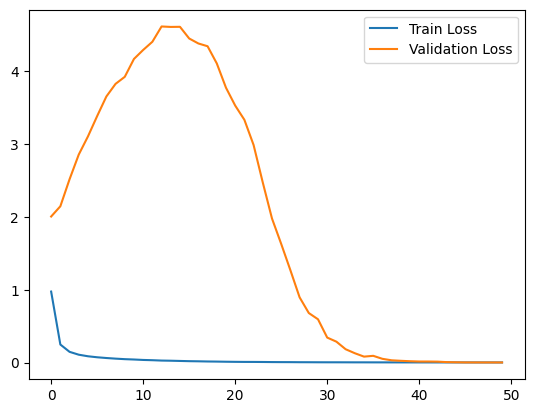

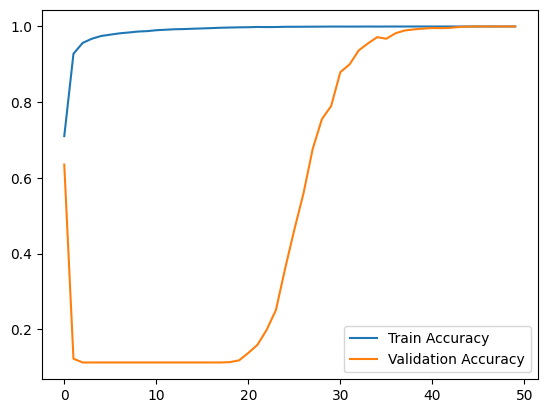

In [7]:
print(hist.history.keys())

plt.plot(hist.history["loss"],label = "Train Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.legend()
plt.show()

plt.plot(hist.history["accuracy"],label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"],label="Validation Accuracy")
plt.legend()
plt.show()
